In [4]:
# from nsetools import Nse
# nse = Nse()

In [1]:
# all_stocks_code = nse.get_stock_codes()
# all_stocks_code

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import yfinance as yf

In [21]:
# Specify the ticker symbol for Reliance Industries Limited
ticker = "AMZN"

# Download historical market data
a_df = yf.download(ticker, start="2020-01-01", end="2024-07-21")

# Display the data
# print(data)
a_df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000


/tmp/ipykernel_5769/2694676930.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  a_df = a_df.fillna(method='ffill')


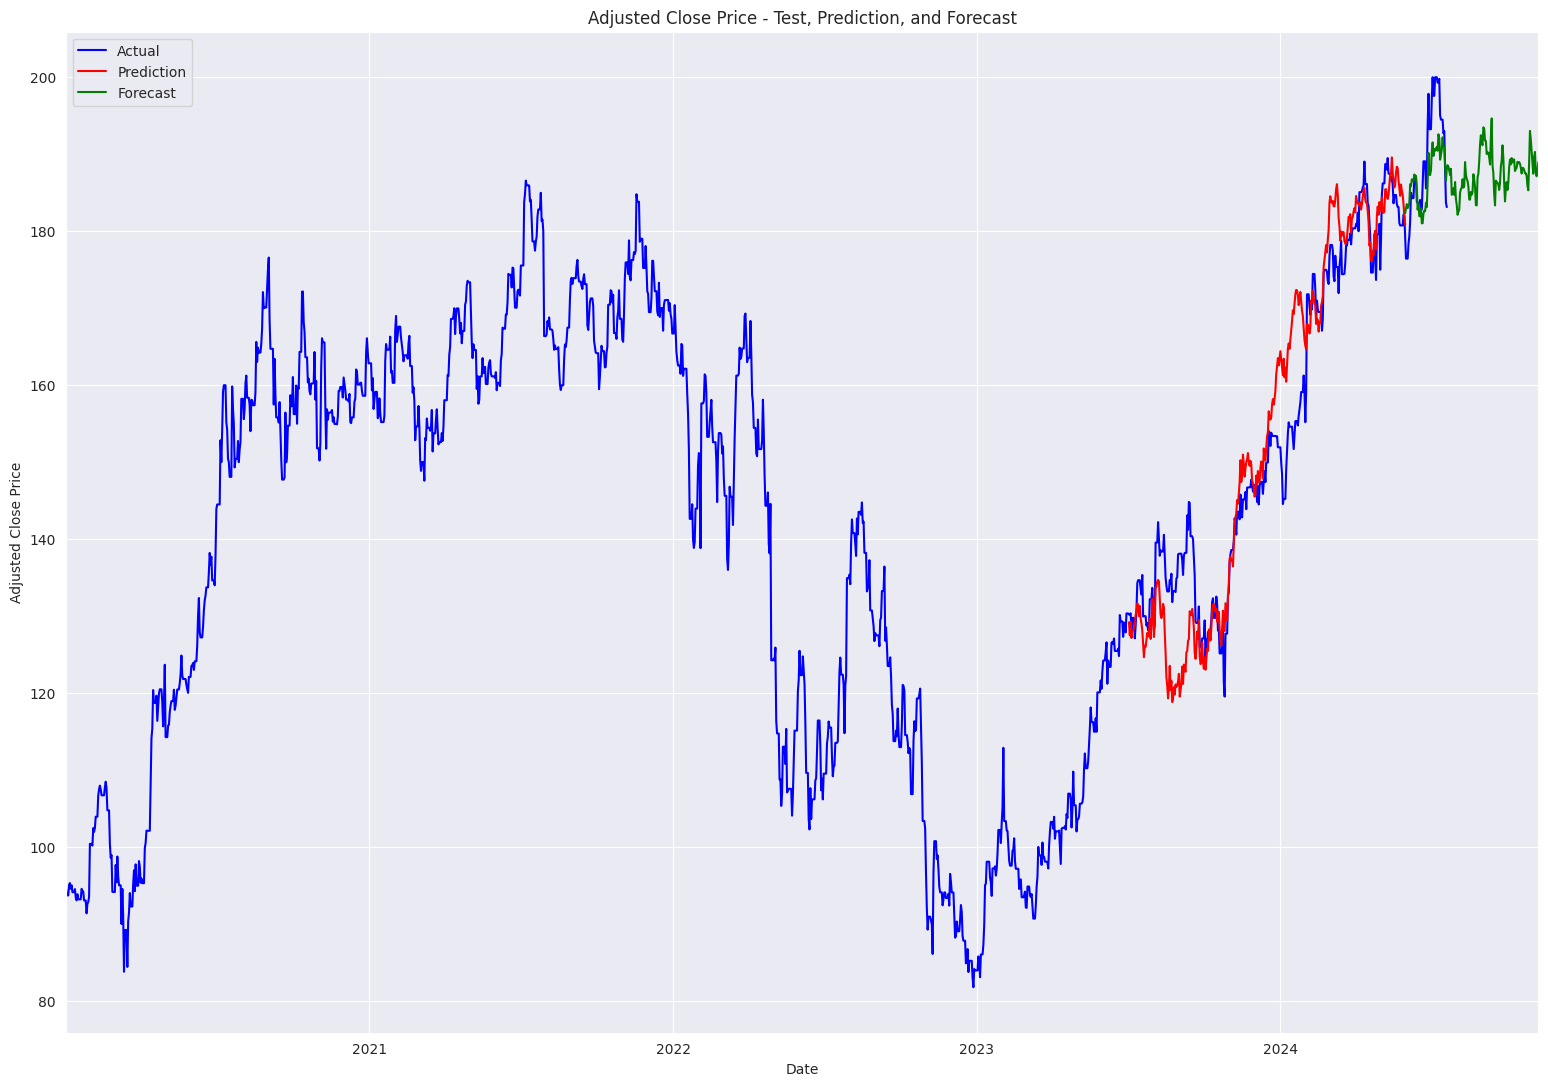

In [22]:
# Load and preprocess data
# a_df = get_df_from_csv("GOOG")
a_df = a_df.asfreq('d') 
a_df = a_df.fillna(method='ffill')
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)
a_df = a_df.drop(['Open','High','Low','Close','Volume'], axis=1)

# Set up plot style
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(19, 13))

# Determine optimal lags and fit model
lags = ar_select_order(a_df, maxlag=30)
model = AutoReg(a_df['Adj Close'], lags.ar_lags)
model_fit = model.fit()

# Split data into training and testing sets
n = int(len(a_df) * 0.8)
train_df = a_df.iloc[50:n]
test_df = a_df.iloc[n:]

# Fit the model on the training data
train_model = AutoReg(a_df['Adj Close'], 600).fit(cov_type="HC0")
start = len(train_df)
end = len(train_df) + len(test_df) - 1

# Make predictions
prediction = train_model.predict(start=start, end=end, dynamic=True)

# Plot test data and predictions
fig, ax = plt.subplots()
ax = a_df['Adj Close'].plot(ax=ax, color='blue', label='Actual')
ax = prediction.plot(ax=ax, color='red', label='Prediction')

# a_df['Adj Close'].plot(ax=ax, color='black', label='Raw Data')

# Forecast future values
forecast = train_model.predict(start=end, end=end+160, dynamic=True)
ax = forecast.plot(ax=ax, color='green', label='Forecast')

# Customize the plot
plt.legend()
plt.title('Adjusted Close Price - Test, Prediction, and Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()
